## Report: act_report


In [1]:
import pandas as pd
import numpy as np
import requests
from PIL import Image 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df_resume=pd.read_csv('twitter_archive_master.csv')

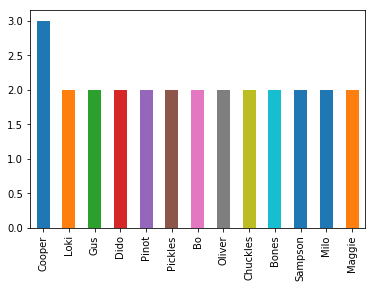

In [3]:
# Les 13 noms les plus populaires
df_resume.name.value_counts().sort_values(ascending=False).head(13).plot(kind='bar');

In [4]:
ret_fav_df=df_resume.groupby('stade', as_index=False)[['retweet_count', 'favorite_count']]

In [5]:
ret_fav_df.sum()

,stade,retweet_count,favorite_count
0,doggo,218492,726754
1,floofer,11236,47795
2,pupper,270437,903321
3,puppo,50060,187826


In [6]:
# Caractéristiques du chien ayant obtenu la mailleur note: 1.5
good_mark=df_resume.query('note==1.5')
good_mark

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,note,stade,retweet_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
66,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,15,10,Sophie,1.5,pupper,1885,...,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,True,cocker spaniel,0.01595,True,lhasa,0.006519,True


In [7]:
good_mark.favorite_count

66    7320
Name: favorite_count, dtype: int64

In [8]:
good_mark.jpg_url

66    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
Name: jpg_url, dtype: object

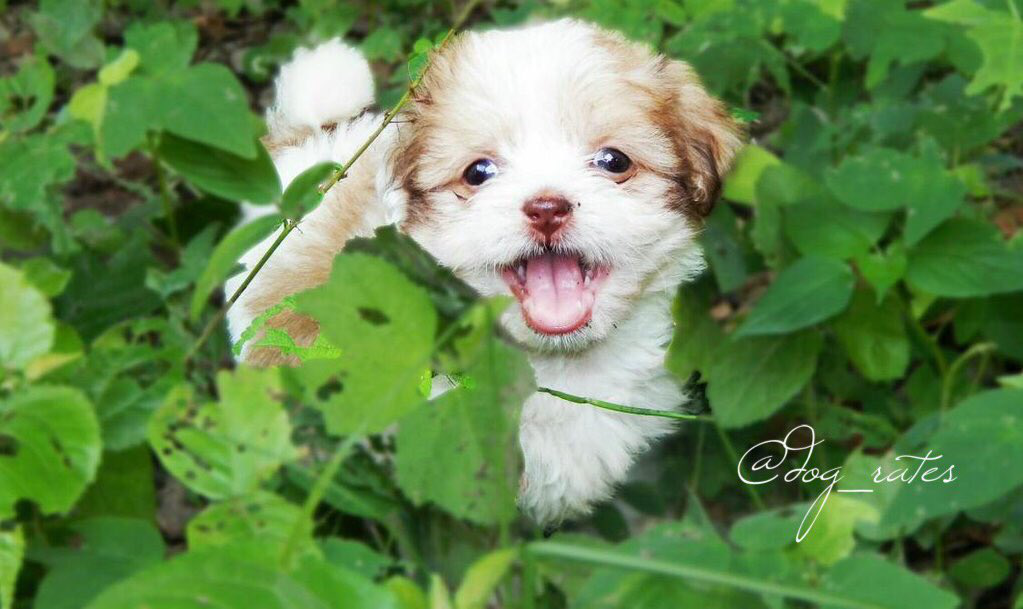

In [10]:
# Image du chien ayant reçu la meilleur note de 1.5. Sophie
Image.open('Sophie.jpg')

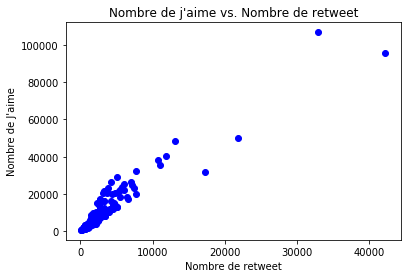

In [9]:
# Nuage de points Nombre de j'aime vs. Nombre de retweet
plt.scatter(df_resume.retweet_count, df_resume.favorite_count, color='b')
plt.xlabel('Nombre de retweet')
plt.ylabel("Nombre de J'aime")
plt.title("Nombre de j'aime vs. Nombre de retweet");

Après un nettoyage non exhaustif des données, j'ai essayé de réaliser quelques analyses afin d'avoir des informations sur certaines caractéristiques des données nettoyer. 
J'ai remarqué que les notes variaient entre 0.7 et 1.5. Il faut noter que les notes dont les némurateurs sont compris entre 0.1 et 1.4 inclus sont les plus fréquentes(presque 82% des notes). Seul un chien, du nom de **Sophie** et ayant reçu plus de 7300 **j'aime**, a obtenu une note de 1.5 dont l'iamge a été présentée plus haut. 
Une autre caractéristique observée sur les données nettoyer est que les chiens à l'étape **pupper** (121) sont plus nombreux, ceux à l'étape **doggo** (40) suivent tandis que les chiens à l'étape **flooffer**(5) sont les moins nombreux. 
Aussi, faut-il remarquer que les chiens **puppper** ont plus reçu des j'aime que les autres. En fait, le même schéma osbervé avec les effectifs des différents stades des chiens  est conservé  pour le nombre de j'aime. Par contre, le nombre de retweet ne conserve pas ce schéma. Là, ce sont les chiens **doggo** qui ont été les plus retwweté. Le fait le plus marquant est que ce sont les chiens plus populaies (**pupper**) se sont pas en tête dans le classement. Cela peut laisser penser qu'il n'y a pas une relation entre le nombre de retweets et celui de j'aime.
Le nom le plus populaire est **Cooper**, qui a été attribué à trois chiens différents. 
Pour finir les analyses, j'ai essayé de visualiser le nuage de points 'retweet_count - favorite count' afin de voir s'il pourrait exister une relation linéaire entre les deux variables. Au regard de ce nuage de points, on pourrait dire qu'il existe une relation linéaire entre le nombre de retweet et celui des j'aimes, en d'autres termes plus on fait du retweet et plus on a a des j'aime.  
